In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [5]:
life=pd.read_csv('/Users/vaishnaviuttarkar/Life Expectany/Life_Expectancy_Model/CleanLifeExpectancy.csv')

In [6]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2938 non-null   float64
 4   AdultMortality                2938 non-null   int64  
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2938 non-null   int64  
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2938 non-null   int64  
 13  Tot

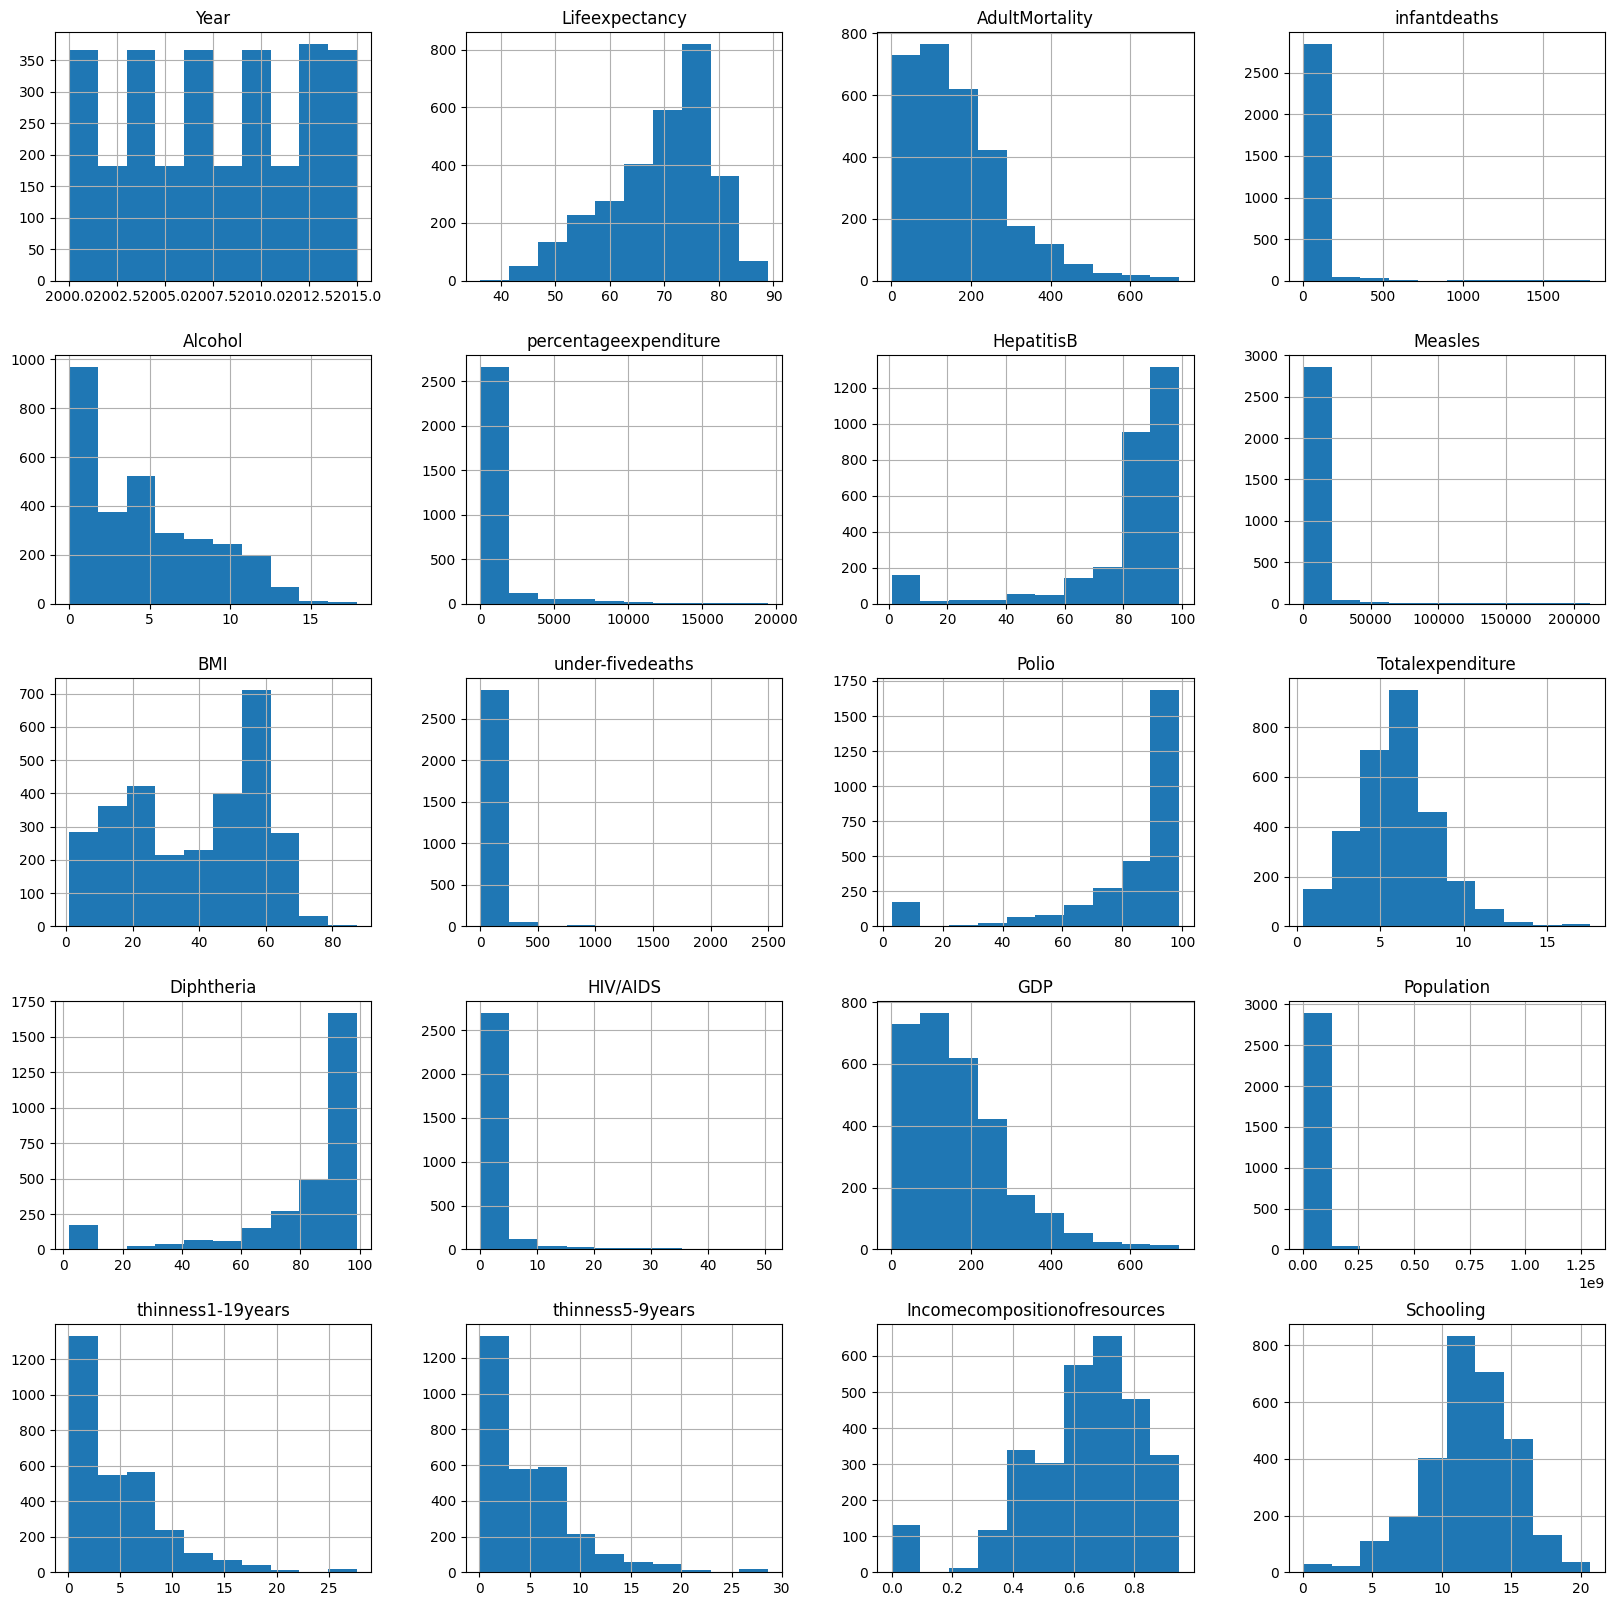

In [7]:
life.hist()
his=plt.gcf()
his.set_size_inches(20,20)
plt.show()

In [8]:
# life.to_csv('CleanedLifeExpectancy.csv',index=False)

Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a= life.select_dtypes(include='object').columns
for i in a:
    life[i] = le.fit_transform(life[i])

In [10]:
life.dtypes

Country                           int64
Year                              int64
Status                            int64
Lifeexpectancy                  float64
AdultMortality                    int64
infantdeaths                      int64
Alcohol                         float64
percentageexpenditure           float64
HepatitisB                        int64
Measles                           int64
BMI                             float64
under-fivedeaths                  int64
Polio                             int64
Totalexpenditure                float64
Diphtheria                        int64
HIV/AIDS                        float64
GDP                               int64
Population                        int64
thinness1-19years               float64
thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
dtype: object

Separating dependent and independent variables

In [11]:
life.shape

(2938, 22)

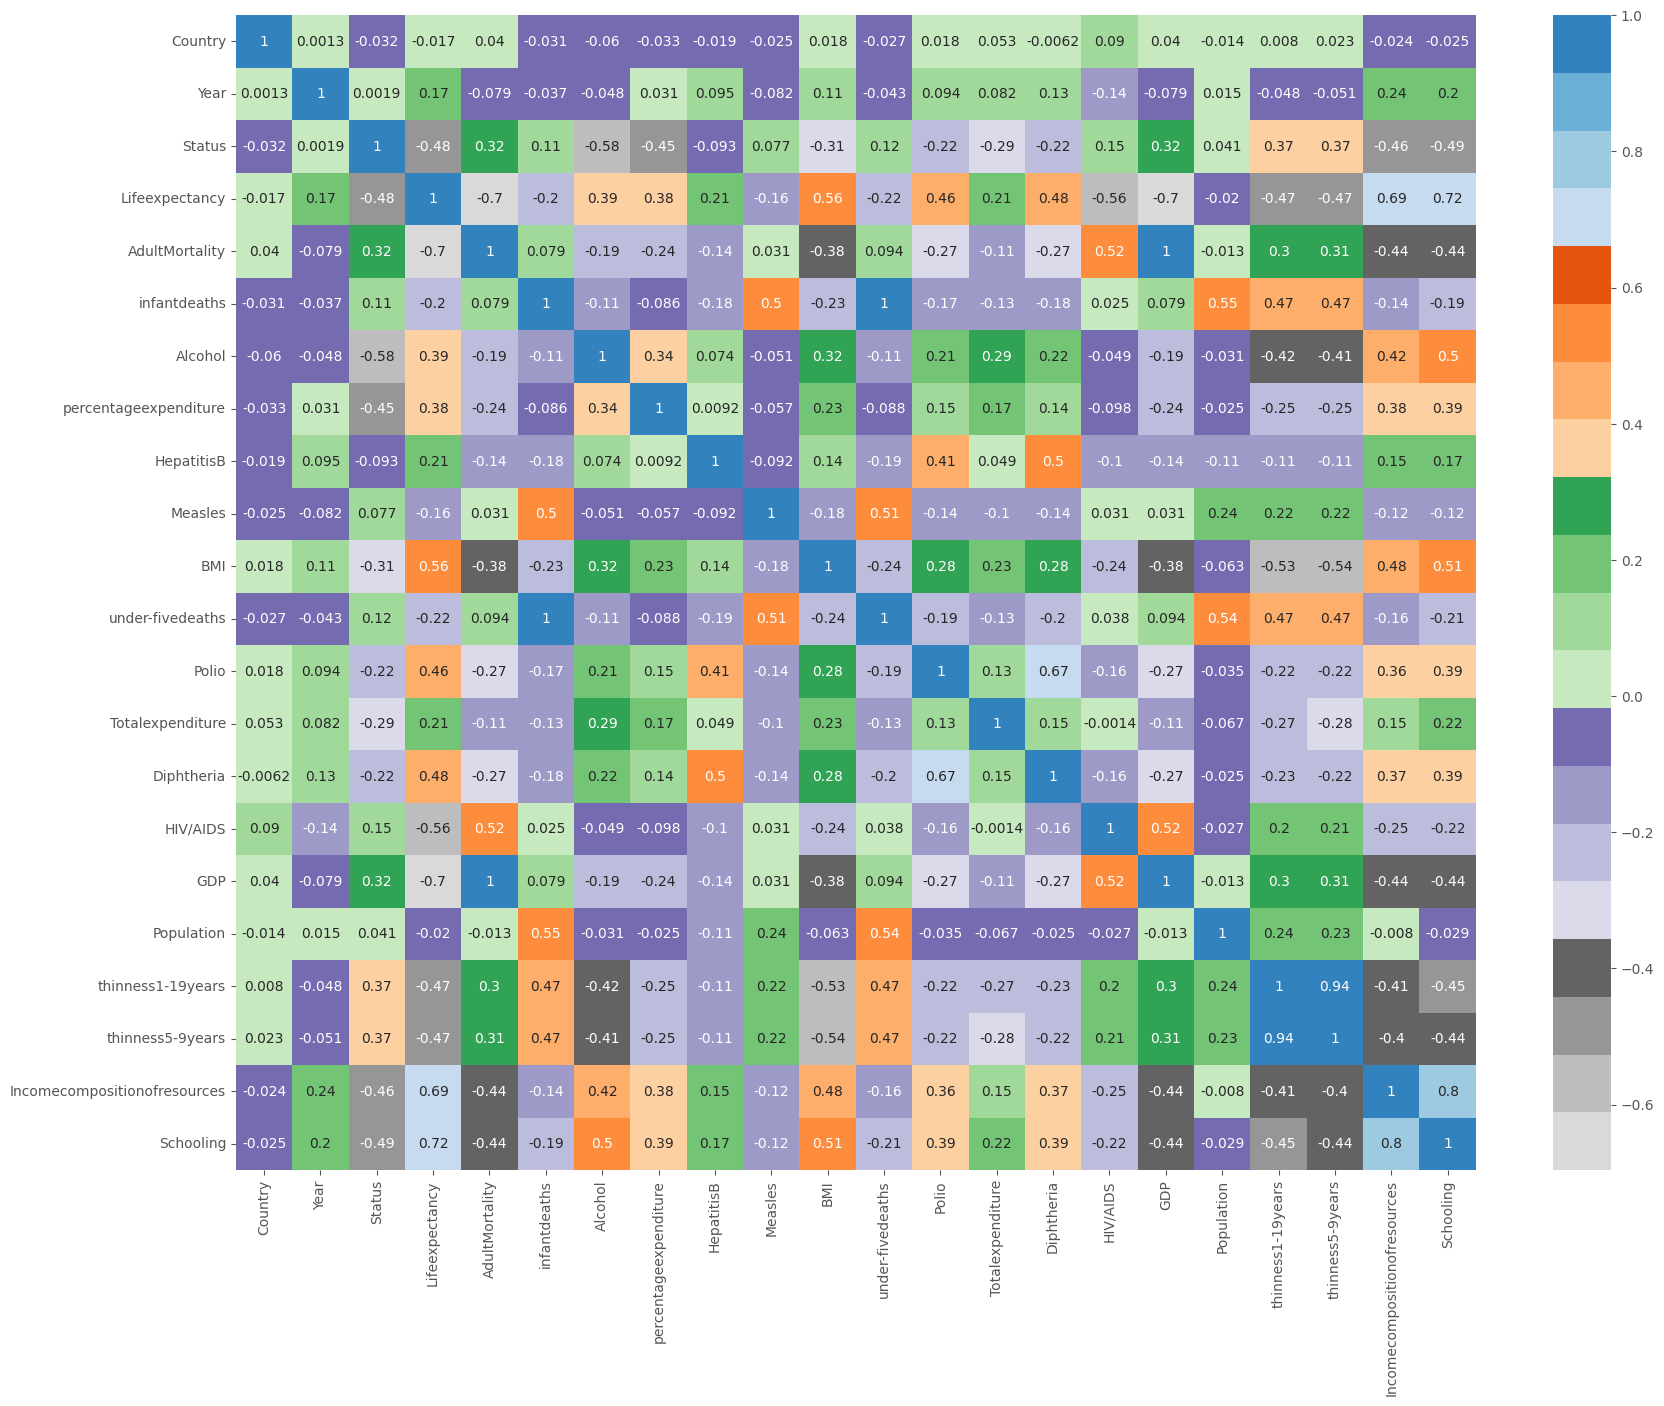

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(life.corr(),annot=True,cmap='tab20c_r')
plt.show()

In [12]:
X=life.drop(columns='Lifeexpectancy')
y=life['Lifeexpectancy']

Performing train-test split


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Trying out several algorithms

In [14]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

In [15]:
alg=[LinearRegression(),Ridge(),Lasso(),DecisionTreeRegressor(),RandomForestRegressor(),XGBRegressor(),KNeighborsRegressor()]

names=['linearregression','ridgeregression','lassoregression','decisiontreeregressor','randomforestregressor','xgboostregressor','kneighborsregressor']

In [16]:
l1=[]
for i in alg:
    model=i
    model.fit(X_train,y_train)
    y_hat=model.predict(X_test)
    mse=mean_squared_error(y_test,y_hat)
    rmse=sqrt(mse)
    l1.append(rmse)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.23045e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.088e+04, tolerance: 2.145e+01
  model = cd_fast.enet_coordinate_descent(


In [17]:
eval=pd.DataFrame({'Model':names,
                  'RMSE':l1})

In [18]:
eval

,Model,RMSE
0,linearregression,3.889173
1,ridgeregression,3.886908
2,lassoregression,3.964915
3,decisiontreeregressor,2.489077
4,randomforestregressor,1.647704
5,xgboostregressor,1.777019
6,kneighborsregressor,9.156520


Conclusion: Random forest gives the best accuracy

In [19]:
from sklearn.ensemble import RandomForestRegressor

rr=RandomForestRegressor ()

rr.fit(X_train,y_train)

y_hat=rr.predict(X_test)

In [20]:
y_hat

array([73.121     , 75.914     , 74.972     , 75.998     , 52.384     ,
       51.532     , 66.108     , 73.887     , 77.061     , 55.876     ,
       51.828     , 52.847     , 57.553     , 73.893     , 69.34624658,
       62.168     , 58.383     , 79.183     , 69.898     , 78.873     ,
       81.106     , 84.732     , 72.19      , 68.71349863, 71.03374249,
       67.625     , 56.162     , 65.203     , 82.488     , 74.089     ,
       67.189     , 73.885     , 74.102     , 71.661     , 78.691     ,
       48.851     , 60.125     , 72.81324932, 63.776     , 73.85      ,
       54.913     , 60.438     , 75.483     , 81.564     , 76.654     ,
       49.444     , 80.354     , 74.303     , 59.907     , 72.122     ,
       54.457     , 71.251     , 82.324     , 80.786     , 74.527     ,
       58.227     , 73.13624932, 75.27      , 63.36      , 69.942     ,
       78.377     , 54.457     , 74.427     , 71.938     , 52.783     ,
       54.02      , 53.263     , 76.831     , 60.052     , 71.33

In [21]:
from sklearn.metrics import r2_score
r2_score(y_hat,y_test)

0.9683362996198671

In [22]:
life.columns

Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')

In [23]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   int64  
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   int64  
 3   Lifeexpectancy                2938 non-null   float64
 4   AdultMortality                2938 non-null   int64  
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2938 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2938 non-null   int64  
 9   Measles                       2938 non-null   int64  
 10  BMI                           2938 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2938 non-null   int64  
 13  Tot

In [24]:
inputfeatures=[15,2016,1,100,1000,3.4,56.6,80,8000,19.1,800,90,5.9,90,0.3,1500.1,13245172,20.1,26.5,0.643,11.1]

In [25]:
#input_features=sc.fit_transform([inputfeatures])

In [26]:
#rr.predict(input_features)

In [27]:
rr.predict([[20,2017,0,100,1000,4.4,57.6,80,9000,18.1,700,80,6.9,80,0.4,2500.1,132451723,21.1,25.5,0.463,12.1]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([66.358])

- Testing training data as an input

Expected = 79.7

In [28]:
# Iceland-2000 (79.7)
inputfeatures=[75,2000,0,74,0,6.17,5809.122,80,0,54.2,0,98,9.28,98,0.1,74,28125,1,0.9,0.847,16.8]

rr.predict([inputfeatures])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([79.941])

In [29]:
# Iraq-2015 (68.9)
inputfeatures=[79,2015,1,182,32,4.602861,0,56,1433,59.1,38,63,5.93819,58,0.1,182,36115649,5.3,5.1,0.649,10.1]
#input_features=sc.fit_transform([inputfeatures])
rr.predict([inputfeatures])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([69.383])

In [30]:
# Greece-2014 (88)
inputfeatures=[66,2014,1,73,0,7.53,2163.043,96,1,66,0,99,8.8,99,0.1,73,1892413,0.8,0.7,0.862,17.2]

rr.predict([inputfeatures])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([85.979])

In [31]:
# Cyprus-2015 (85)
inputfeatures=[43,2015,0,52,0,4.602861,0,97,0,6.3,0,97,5.93819,97,0.1,52,116985,1,1,0.854,14.3]

rr.predict([inputfeatures])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([83.673])

In [32]:
# Hungary-2011 (74.8)
inputfeatures=[79,2015,1,182,32,4.602861,0,56,1433,59.1,38,63,5.93819,58,0.1,182,36115649,5.3,5.1,0.649,10.1]

rr.predict([inputfeatures])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([69.383])

In [33]:
# Latvia-2007 (78)
inputfeatures=[92,2007,0,221,0,12.12,170.9884,91,0,57.7,0,94,7.1,94,0.1,221,22325,2.4,2.4,0.814,16.2]

rr.predict([inputfeatures])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([73.423])

In [34]:
# Malawi-2010 (52.9)
inputfeatures=[100,2010,1,462,35,1.08,9.728005,93,118712,17.6,54,86,1.5,93,13.7,462,1516795,6.8,6.7,0.43,10.2]

rr.predict([inputfeatures])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([52.777])

In [35]:
# Nepal-2002 (63.1)
inputfeatures=[118,2002,1,238,40,0.19,23.18395,80,6749,12.4,54,72,5.6,72,0.1,238,24566342,18.2,18.8,0.447,8.6]

rr.predict([inputfeatures])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([63.041])

In [36]:
# # Nepal-2002 (63.1)
# inputfeatures=[118,2002,1,238,40,0.19,23.18395,80,6749,12.4,54,72,5.6,72,0.1,238,24566342,18.2,18.8,0.447,8.6]
# input_features=sc.fit_transform([inputfeatures])
# rr.predict(input_features)

In [37]:
import pickle

In [38]:
pickle.dump(rr,open('RandomRegressionModel.pkl','wb'))

In [39]:
# life.info()

In [40]:
# life.to_csv('CleanedLifeExpectancyDataset.csv',index=False)